In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from scipy.stats import ranksums
import os

# font_dirs = ['/storage/home/hcoda1/8/zmobille3/scratch/arial']
# font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
# for font_file in font_files:
#     font_manager.fontManager.addfont(font_file)
# # font_manager.get_font_names()

# plt.rcParams['font.family']='Arial'
# plt.rcParams['font.size']=22
# plt.rcParams['axes.titlesize']=22
# plt.rcParams['xtick.labelsize']=15
# plt.rcParams['ytick.labelsize']=15

In [3]:
try:
    os.mkdir('singleNrnMI_plots')
except FileExistsError:
    pass

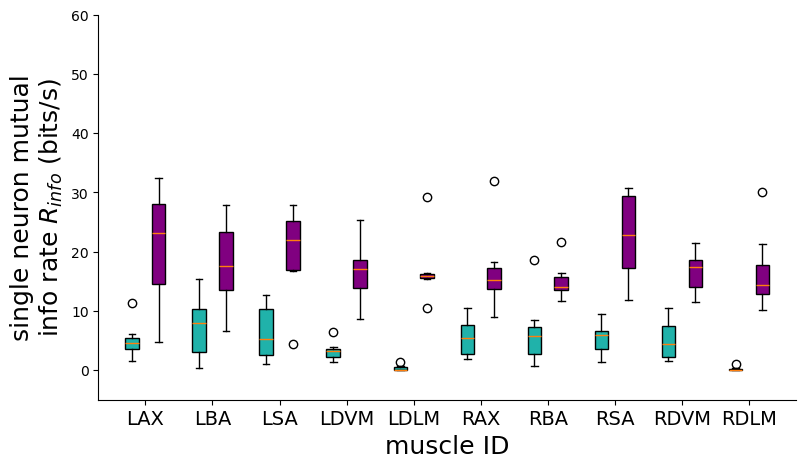

In [4]:
T= 0.05 # wingstroke period in seconds

muscleNames = ["LAX","LBA","LSA","LDVM","LDLM",
    "RAX","RBA","RSA","RDVM","RDLM"]

all_cmis = np.load('all_cmis.npy')/T
all_tmis = np.load('all_tmis.npy')/T

nummuscles = all_cmis.shape[1]

ccolors = ['lightseagreen' for x in range(nummuscles)]
tcolors = ['purple' for x in range(nummuscles)]

fig, ax = plt.subplots(figsize=(9,5))
cplot = ax.boxplot(all_cmis,
                  patch_artist=True,
                  positions=np.arange(0.8,nummuscles,1),
                  widths=0.2*np.ones(nummuscles))

for patch, color in zip(cplot['boxes'], ccolors):
    patch.set_facecolor(color)
    
    
tplot = ax.boxplot(all_tmis,
                  patch_artist=True,
                  positions=np.arange(1.2,nummuscles+1,1),
                  widths=0.2*np.ones(nummuscles))

for patch, color in zip(tplot['boxes'], tcolors):
    patch.set_facecolor(color)

plt.ylim(-5,60)
# plt.yticks([0,0.5,1,1.5,2,2.5,3.])
plt.ylabel('single neuron mutual\ninfo rate $R_{info}$ (bits/s)',fontsize=18)
plt.xlabel('muscle ID',fontsize=18)
sns.despine()
plt.xticks(np.arange(1,nummuscles+1,1),muscleNames,fontsize=14)
plt.savefig('singleNrnMI_plots/allMuscles_julia.png',bbox_inches='tight',dpi=200)
plt.savefig('singleNrnMI_plots/allMuscles_julia.svg',bbox_inches='tight',dpi=200)
plt.show()

0.0008725593497644525


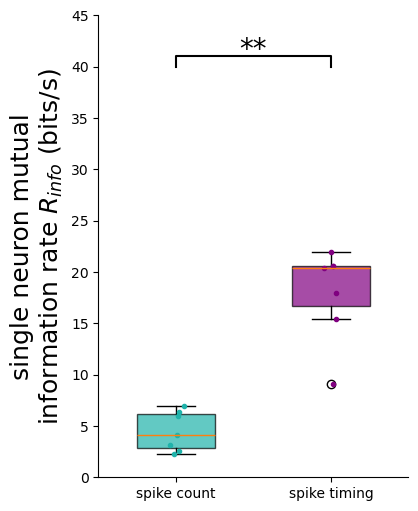

In [5]:
all_tmis_nrn_avg = np.mean(all_tmis,axis=1)
all_cmis_nrn_avg = np.mean(all_cmis,axis=1)

fig,ax = plt.subplots(figsize=(4,6))

clrs = ['lightseagreen','purple']
both_mis = [all_cmis_nrn_avg, all_tmis_nrn_avg]
bplot = plt.boxplot(both_mis, patch_artist=True, widths=0.5)
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
plt.xticks([1,2],['spike count','spike timing'])

for i in [1,2]:
    clr=clrs[i-1]
    y=both_mis[i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')

stat, pval = ranksums(both_mis[0], both_mis[1], alternative='less')
if pval < 0.05:
    p='**'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 40., 1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+3*h, p, ha='center', va='top', color=col, fontsize=20)
plt.ylim(0,45)

plt.ylabel('single neuron mutual\ninformation rate $R_{info}$ (bits/s)',fontsize=18)
sns.despine()
plt.savefig('singleNrnMI_plots/NrnAvgOutBoxplot_exp_0p0001_julia.png',bbox_inches='tight',dpi=200)
plt.savefig('singleNrnMI_plots/NrnAvgOutBoxplot_exp_0p0001_julia.svg',bbox_inches='tight',dpi=200)
plt.show()